# Úkol č. 2 - Využití shlukování pro počítání objektů na obrázku
  * **Deadline je do 22. listopadu 23:59.** Pokud odevzdáte úkol do 29. listopadu 23:59 budete penalizování -4 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte vhodným způsobem vybírat příznaky pro shlukovací algoritmy. Někdy je vhodné použít barevnou reprezentaci obrázku (RGB nebo spíše HSV), jindy je lepší použít souřadnice pixelů v obrázku.
  * Samozřejmě existují mnohem pokročilejší nástroje pro segmentaci objektů na obrázku, které jsou dostupné v různých knihovnách, ale tady nám jde o to vyzkoušet si na jednoduché úloze aplikaci základních shlukovacích metod.
  * Vaším cílem je využít algoritmus **KMeans a hierarchické aglomerativní shlukování** k tomu, abyste vytvořili jednoduchý kód, který, když na vstupu dostane obrázek z dané sady, dokáže vrátit **počet objektů**, které se na obrázku vyskytují.
  
  
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Zdroj dat
Budeme pracovat s obrázky, které jsou uložené v podadresáři `data` a originálně pocházejí z datasetu [CLEVR](https://cs.stanford.edu/people/jcjohns/clevr/). Na těchto obrázcích jsou různě rozmístěné barevné objekty na šedém pozadí.

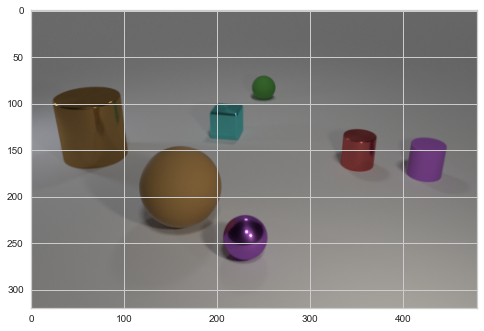

In [224]:
# Ukázka jednoho z obrázků
from PIL import Image
from matplotlib import pyplot as plt

with Image.open("data/CLEVR_test_001109.png").convert('RGB') as image:
    plt.imshow(image)

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **12 bodů**:
- Vezměte libovolný obrázek z datasetu (pro začátek doporučuji nějaký, kde jsou objekty spíše dál od sebe), načtěte ho a zobrazte.
- Převeďte ho do `numpy` array, která pak přeskupte (reshape) do pole bodů v prostoru RGB, tj. do tvaru `(počet bodů, 3)`.
- V tomto barevném příznakovém prostoru zkuste provést shlukování (vyberte vhodný algoritmus na základě velikosti a charakteru dat) a diskutujte výsledky (které asi nebudou nic moc).
- Zkuste příznaky obohatit o prostorové souřadnice (k tomu využijte numpy funkci `meshgrid` s parametrem `indexing='ij'` a také funkci `concatenate`, která umožní připojení k obrázkovým datům). Jako výstup tohoto kroku byste měli mít pole ve tvaru `(počet bodů, 5)`, kde první 3 příznaky odpovídají barvám a zbylé dva souřadnicím každého z pixelů.
- V tomto obohaceném příznakovém prostoru znovu zkuste shlukování a diskutujte výsledky (které asi opět nebudou nic moc).
- Nyní to celé zkusíme znovu, ale po načtení a zobrazení si obrázek převedeme do barevné reprezentace HSV. V první fázi si tedy obrázek načtěte do HSV reprezentace (balíček PIL na to má metodu `convert("HSV")`).
- Dále v tomto novém barevném prostoru proveďte shlukování pomocí KMeans a vhodným výběrem shluků (koukejte na saturation příznak) si odseparujte barevné objekty od pozadí (bez jejich odlišení - to provedeme později).
Dostanete něco takového: 

![title](./mask_of_objects.png)
- Když už máme objekty odseparované od pozadí (použijte logickou masku pro filtrování array, kterou si vytvoříte v předchozím kroku), budeme dále pracovat pouze s odpovídajícími pixely (pozadí už ne bereme). 
- Nyní si pro tyto pixely vytvoříme reprezentaci pomocí jejich souřadnic v původním obrázku (použijeme výše zmíněný `meshgrid` a také logickou masku).
- V tomto souřadnicovém prostoru proveďte vhodné shlukování, aby došlo ke správnému odseparování předmětů.
Finální výstup by měl vypadat nějak takto:

![title](./final_output.png)
- Diskutujte úskalí navrženého postupu a jeho univerzálnost pro počítání objektů na libovolném pozadí resp. částečně se překrývajících objektů. 

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 16 bodů):
- (až +4 body) Polaďte algoritmus tak, aby pro téměř libovolný vstup z dané datové sady vypsal správný počet objektů a odseparoval je tak, jak je zobrazeno výše. K tomu je třeba správně zvolit shlukovací algoritmus v posledním kroku a také kritérium pro automatickou detekci správného počtu shluků. Diskutujte Váš postup.
- (až +4 body) Poslední shlukování pro odseparování předmětů jsme dělali pouze v souřadnicovém prostoru. Zkuste experimentovat s reprezentací v prostoru, kde jsou zkombinovány jak barevné tak i souřadnicové příznaky (s různými váhami mezi oběma skupinami). Cílem je opět automatická detekce počtu objektů pro libovolný vstup z dané datové sady. Diskutujte Váš postup a případné výhody tohoto přístupu, ve kterém se kombinují oba typy příznaků.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

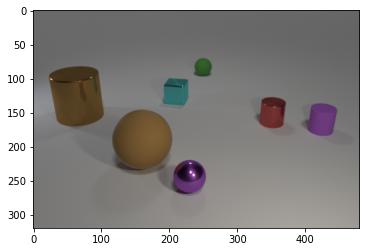

In [1]:
from PIL import Image
from matplotlib import pyplot as plt

with Image.open("data/CLEVR_test_001109.png").convert('RGB') as image:
    plt.imshow(image)

In [2]:
import numpy as np

In [3]:
image = np.array(image)

In [4]:
image.shape

(320, 480, 3)

In [5]:
rows, cols, channels = image.shape

In [6]:
image = image.reshape(rows * cols, channels)

In [7]:
def prep_image_for_clustering(img):
    img = np.array(img)
    rows, cols, channels = img.shape
    img = img.reshape(rows * cols, channels)
    return img

## K-Means clustering

In [8]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

### lets make a function from that

In [84]:
def clustering_and_kelbow_visualizer(data, n_init=10):
    model = KMeans(n_init=n_init)
    visualizer = KElbowVisualizer(model, k=(1,10))

    visualizer.fit(image)
    model = KMeans(n_clusters=visualizer.elbow_value_)
    model.fit(data)
    return model, visualizer
    

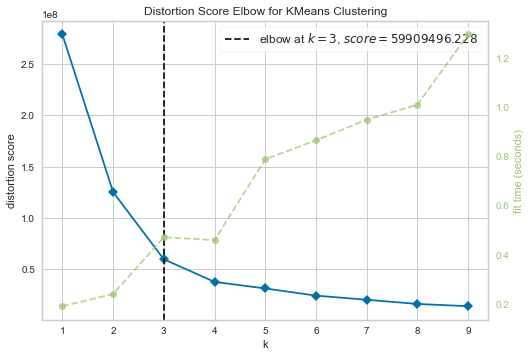

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
model, visualizer = clustering_and_kelbow_visualizer(image)
visualizer.show()

### We can see that there is no clear "elbow" so it would be impossible to choose the correct number of clusters automatically. When we use KElbowvisualizer we get totally wrong answer of 4 clusters.

### lets see how it works for simpler image

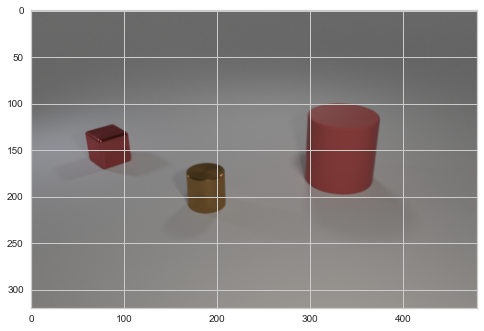

In [11]:
with Image.open("data/CLEVR_test_001685.png").convert('RGB') as image_2:
    plt.imshow(image_2)

In [12]:
image_2 = prep_image_for_clustering(image_2)

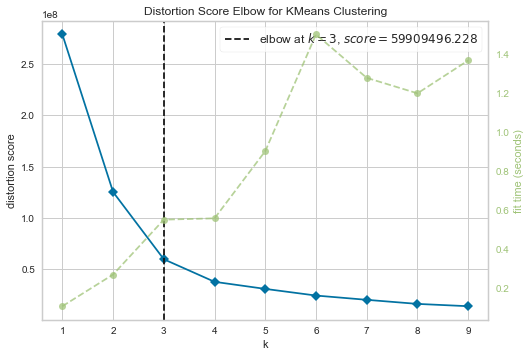

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
model_2, visualizer_2 = clustering_and_kelbow_visualizer(image_2)
visualizer_2.show()

### It looks better here, although the background is not separated from the objects, we would expect 4 clusters, 1 for the background and 3 for the objects

### Lets visualize our results

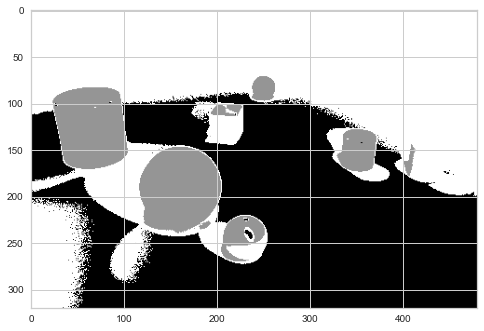

In [14]:
plt.imshow(model.labels_.reshape(rows, cols))

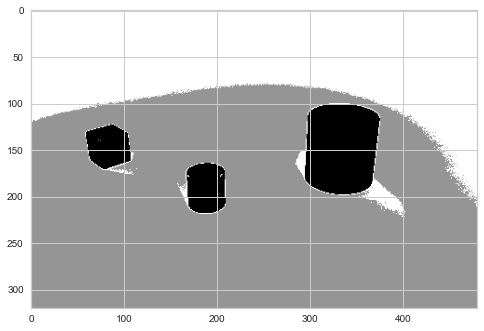

In [15]:
plt.imshow(model_2.labels_.reshape(rows, cols))

## We observe that the clustering is kind of okay in that sence that correct object shapes can be seen, but clearly there are a lot of problems with this result. Basically this is the image comprimation technique but not segmentation.The background messed up the clustering and almost all objects belong to one cluster. So it would make sense to distinguish background first and then perform clustering on remaining objects

## Lets try to add coordinate features first

In [16]:
y = np.linspace(1, cols, cols, dtype="int32")
x = np.linspace(1, rows, rows, dtype="int32")

In [17]:
xres, yres = np.meshgrid(x, y, indexing="ij")

In [18]:
xres = np.array(xres)
yres = np.array(yres)

In [19]:
xres = xres.reshape(rows*cols)
yres = yres.reshape(rows*cols)

In [20]:
image = np.concatenate((image, np.expand_dims(yres, axis=1), np.expand_dims(xres, axis=1)), axis=1)
image_2 = np.concatenate((image_2, np.expand_dims(yres, axis=1), np.expand_dims(xres, axis=1)), axis=1)

In [21]:
image.shape

(153600, 5)

In [22]:
image_2.shape

(153600, 5)

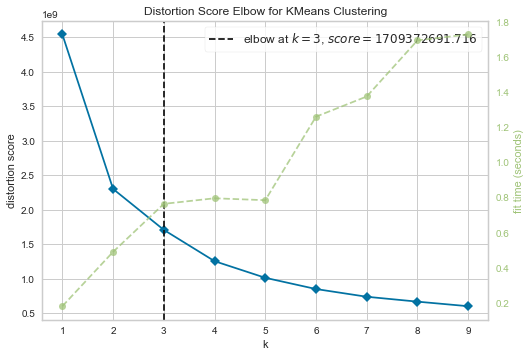

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
model, visualizer = clustering_and_kelbow_visualizer(image)
visualizer.show()

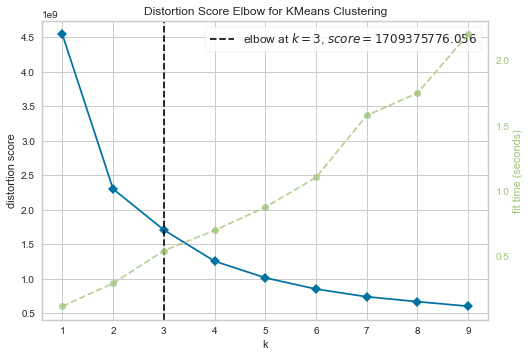

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
model_2, visualizer_2 = clustering_and_kelbow_visualizer(image_2)
visualizer_2.show()

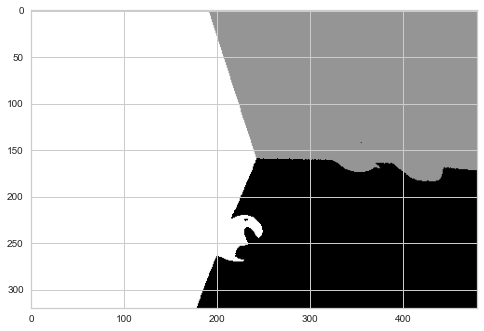

In [25]:
plt.imshow(model.labels_.reshape(rows, cols))

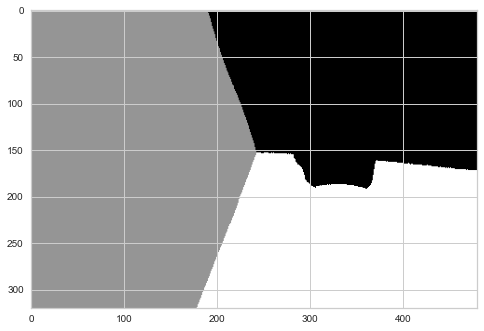

In [26]:
plt.imshow(model_2.labels_.reshape(rows, cols))

## This is a disaster, we can clearly see that the coordinate features overruled everything else. I guess we should try to ou some normalisation to get better results.

In [27]:
from sklearn import preprocessing

In [28]:
scaler = preprocessing.StandardScaler().fit(image)
scaler_2 = preprocessing.StandardScaler().fit(image_2)

In [29]:
image_scaled = scaler.transform(image)
image_2_scaled = scaler_2.transform(image_2)

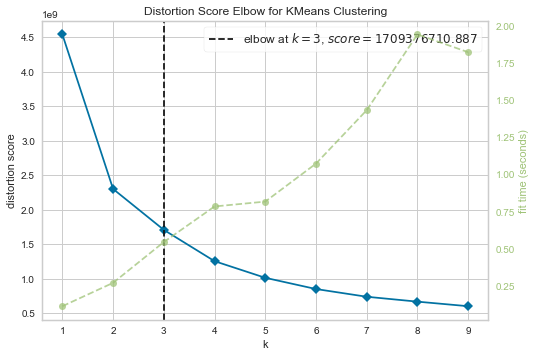

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
model, visualizer = clustering_and_kelbow_visualizer(image_scaled)
visualizer.show()

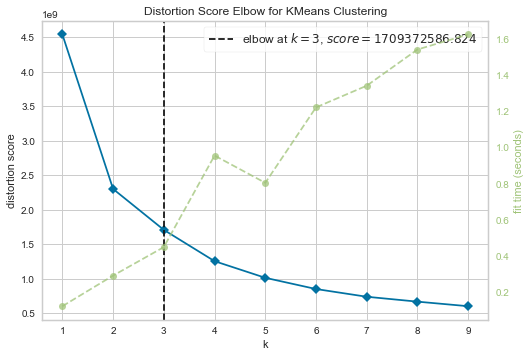

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
model_2, visualizer_2 = clustering_and_kelbow_visualizer(image_2_scaled)
visualizer_2.show()

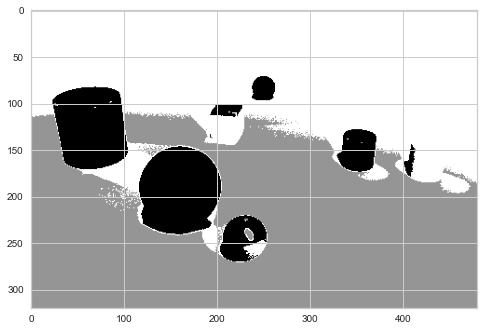

In [32]:
plt.imshow(model.labels_.reshape(rows, cols))

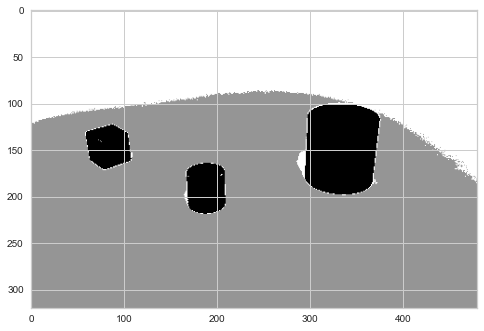

In [33]:
plt.imshow(model_2.labels_.reshape(rows, cols))

## We can see that results are better, object shades are not in same clusters as objects, but the same problem persists. Objects are mostly in one clusters

### Lets try colorful output

In [34]:
import pandas as pd
from matplotlib.pyplot import cm

In [35]:
df = pd.DataFrame({"labels": model_2.labels_, "xcoor": xres, "ycoor": yres})

In [36]:
df

,labels,xcoor,ycoor
0,0,1,1
1,0,1,2
2,0,1,3
3,0,1,4
4,0,1,5
...,...,...,...
153595,1,320,476
153596,1,320,477
153597,1,320,478
153598,1,320,479


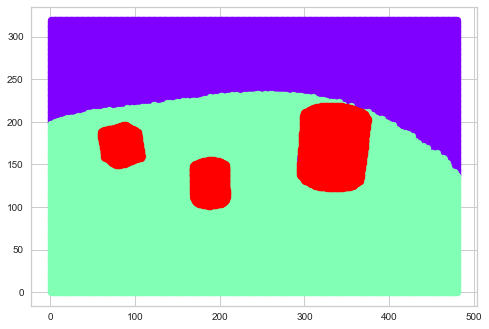

In [37]:
color = iter(cm.rainbow(np.linspace(0, 1, model_2.labels_.max()+1)))
for cluster in range(df.labels.max()+1):
    temp = df.loc[df["labels"] == cluster]
    plt.scatter(temp.ycoor, abs(temp.xcoor-320), color=next(color))
plt.show()

In [203]:
def print_color_cluster(labels, rows, cols):
    y = np.linspace(1, cols, cols, dtype="int32")
    x = np.linspace(1, rows, rows, dtype="int32")
    xres, yres = np.meshgrid(x, y, indexing="ij")
    xres = np.array(xres)
    yres = np.array(yres)
    xres = xres.reshape(rows*cols)
    yres = yres.reshape(rows*cols)
    
    df = pd.DataFrame({"labels": labels, "xcoor": xres, "ycoor": yres})
    
    color = iter(cm.rainbow(np.linspace(0, 1, labels.max()+1)))
    for cluster in range(df.labels.max()+1):
        temp = df.loc[df["labels"] == cluster]
        plt.scatter(temp.ycoor, abs(temp.xcoor-320), color=next(color))
    plt.show()

## Now we try again with HSV color representation

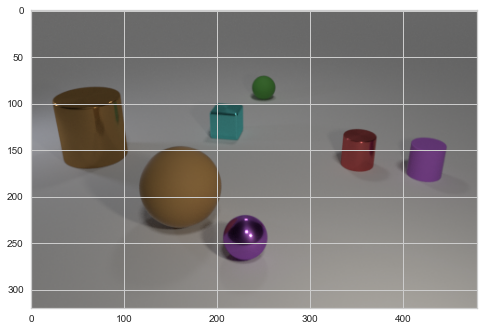

In [175]:
with Image.open("data/CLEVR_test_001109.png").convert('RGB') as image_1:
    image_1 = image_1.convert("HSV")
    plt.imshow(image_1)

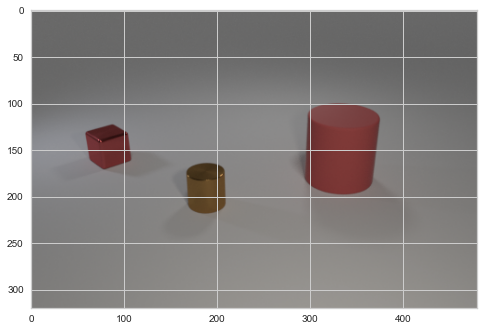

In [176]:
with Image.open("data/CLEVR_test_001685.png").convert('RGB') as image_2:
    image_2 = image_2.convert("HSV")
    plt.imshow(image_2)

### First of all we seperate background from objects using saturation feature

In [177]:
image_1 = prep_image_for_clustering(image_1)
image_2 = prep_image_for_clustering(image_2)

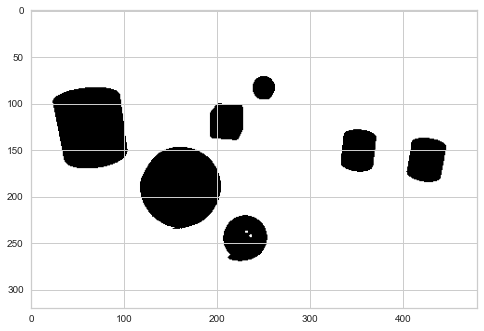

In [178]:
model_1 = KMeans(n_clusters=2)
model_1.fit(image_1[:,1].reshape(-1,1))
plt.imshow(model_1.labels_.reshape(rows, cols))

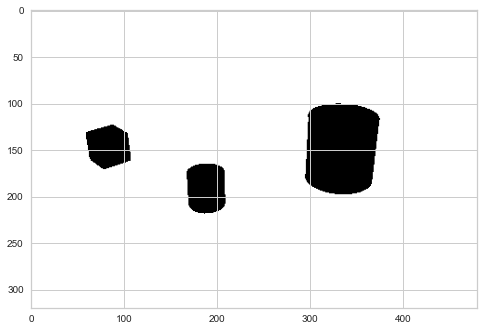

In [179]:
model_2 = KMeans(n_clusters=2)
model_2.fit(image_2[:,1].reshape(-1,1))
plt.imshow(model_2.labels_.reshape(rows, cols))

## This worked pretty well, only problem is that background is sometimes black and sometimes white, so we need to figure out, which label is assigned to background. I assume there is always more background so i just need to figure out, which label is more frequent and that is the background, the other one is the objects

In [180]:
img_1_obj = 1 if (model_1.labels_ == 1).sum() < (model_1.labels_ == 0).sum() else 0
img_1_bgnd = 1 if (model_1.labels_ == 1).sum() > (model_1.labels_ == 0).sum() else 0
img_2_obj = 1 if (model_2.labels_ == 1).sum() < (model_2.labels_ == 0).sum() else 0
img_2_bgnd = 1 if (model_2.labels_ == 1).sum() > (model_2.labels_ == 0).sum() else 0

In [181]:
img_1_obj_mask = model_1.labels_ == img_1_obj
img_1_bgnd_mask = model_1.labels_ == img_1_bgnd
img_2_obj_mask = model_2.labels_ == img_2_obj
img_2_bgnd_mask = model_2.labels_ == img_2_bgnd

## Now we create object mask and seperate objects and add coordinates as new features

In [182]:
image_1_obj = np.concatenate((image_1, np.expand_dims(yres, axis=1), np.expand_dims(xres, axis=1)), axis=1)
image_2_obj = np.concatenate((image_2, np.expand_dims(yres, axis=1), np.expand_dims(xres, axis=1)), axis=1)

In [183]:
image_1_obj = image_1_obj[model_1.labels_ == img_1_obj]
image_2_obj = image_2_obj[model_2.labels_ == img_2_obj]

In [184]:
image_1_obj.shape

(18458, 5)

## Now, we can perform clustering on the objects

### Start with normalisation

In [185]:
scaler_1 = preprocessing.StandardScaler().fit(image_1_obj)
scaler_2 = preprocessing.StandardScaler().fit(image_2_obj)

In [186]:
image_1_obj_scaled = scaler_1.transform(image_1_obj)
image_2_obj_scaled = scaler_2.transform(image_2_obj)

### Clustering

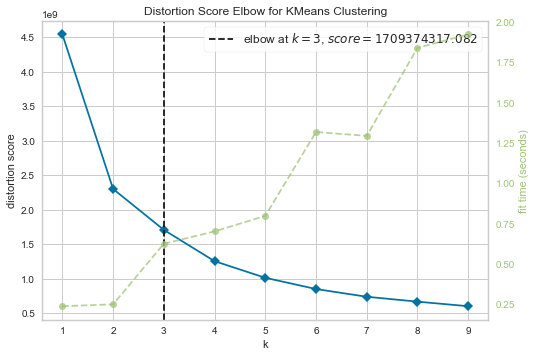

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [187]:
model_1_obj, visualizer = clustering_and_kelbow_visualizer(image_1_obj[:,(3,4)], n_init=10)
visualizer.show()

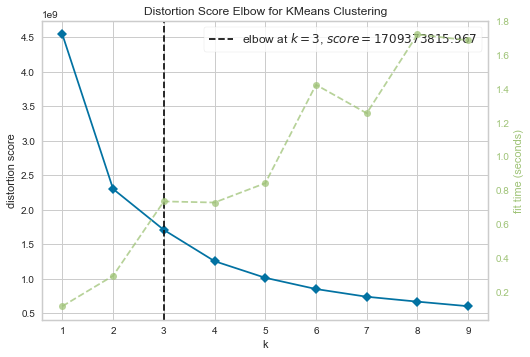

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [188]:
model_2_obj, visualizer = clustering_and_kelbow_visualizer(image_2_obj[:,(3,4)], n_init=10)
visualizer.show()

### Merge background with objects together and visualize result

In [189]:
labels_1 = model_1.labels_ # background will be zero, objects from 1 to n
labels_1[img_1_bgnd_mask] = 0
labels_1[img_1_obj_mask] = model_1_obj.labels_ + 1

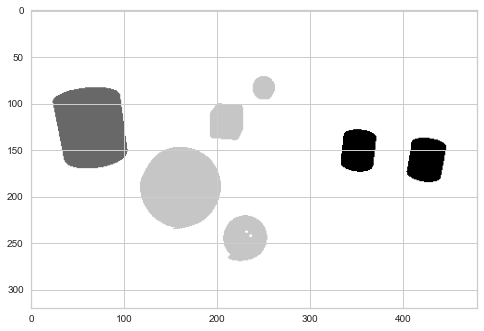

In [190]:
plt.imshow(labels_1.reshape(rows, cols))

In [191]:
labels_2 = model_2.labels_ # background will be zero, objects from 1 to n
labels_2[img_2_bgnd_mask] = 0
labels_2[img_2_obj_mask] = model_2_obj.labels_ + 1

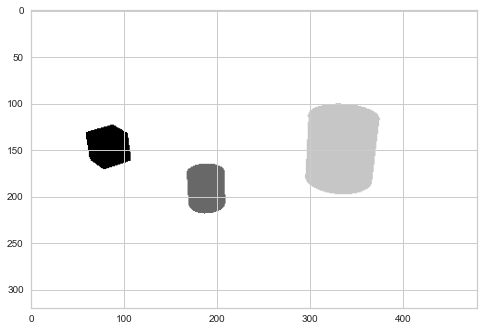

In [192]:
plt.imshow(labels_2.reshape(rows, cols))

## If we only consider only coordinates for object clustering we find out, that it works little bit better, the image with 3 objects is done well, the image with 7 objects is clustered logically but the number of clusters is wrong and with this approach i dont see a way to decide automatically what the best number of clusters is.

## Lets try DBSCAN algorithm, which should be able to detect number of clusters correctly if we can set the  eps parameter correctly. Luckily, as all objects are solid and the distance between two points is given by the image resolution, if two objects dont overlap, we should get pretty good results

In [193]:
from sklearn.cluster import DBSCAN
import math

In [194]:
model_1_obj = DBSCAN(eps=math.sqrt(2))

In [195]:
model_1_obj.fit(image_1_obj[:,(3,4)])

DBSCAN(eps=1.4142135623730951)

In [196]:
labels_1 = model_1.labels_ # background and outliers (-1) will be zero, objects from 1 to n
labels_1[img_1_bgnd_mask] = 0
labels_1[img_1_obj_mask] = model_1_obj.labels_ + 1

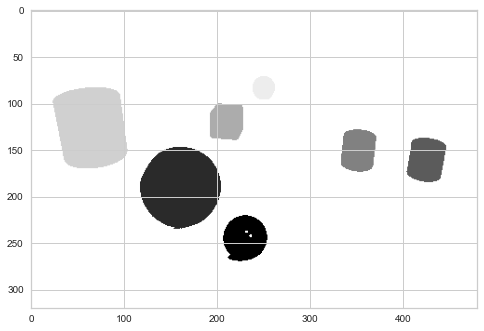

In [197]:
plt.imshow(labels_1.reshape(rows, cols))

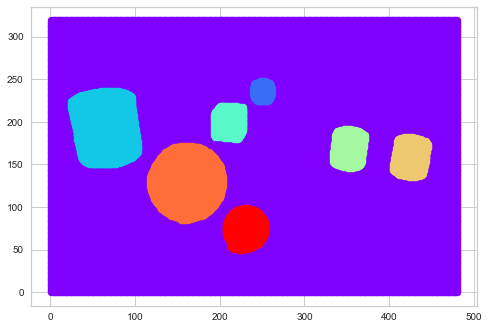

In [204]:
print_color_cluster(labels_1, rows, cols)

In [205]:
model_2_obj = DBSCAN(eps=math.sqrt(2))
model_2_obj.fit(image_2_obj[:,(3,4)])

labels_2 = model_2.labels_ # background and outliers (-1) will be zero, objects from 1 to n
labels_2[img_2_bgnd_mask] = 0
labels_2[img_2_obj_mask] = model_2_obj.labels_ + 1

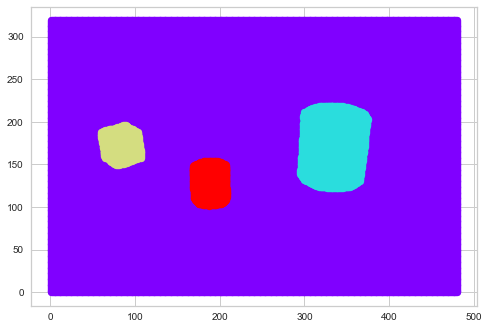

In [207]:
print_color_cluster(labels_2, rows, cols)

### Now we can see that the result is good, exactly what we wanted. If we can assume that no objects overlap, this will work well. In our small dataset I can see that this is the case, only in some cases objects are very near together. But if we chose eps well, this algorithm should work in such cases as well. In case objects overlap, we would have to make other assupmtions. For example that overlaping objects have different color, then we could add the hue feature and choose approproate weigt and/or good normalisation. But I will not do that as in our dataset this is not the case

## Lets try this algorithm on the most difficoult picture, where objects are very close to each other

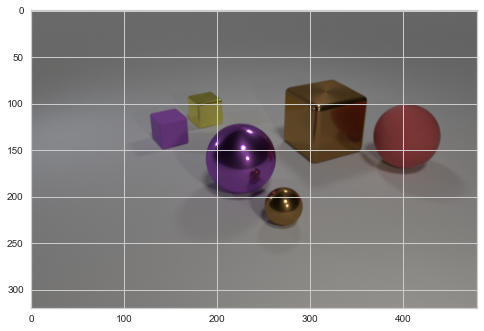

In [208]:
with Image.open("data/CLEVR_test_001256.png").convert('RGB') as image_3:
    image_3 = image_3.convert("HSV")
    plt.imshow(image_3)

### This should be good candidate

## I shall create functions for all the neede steps so I can automatically create the clustering on all images if this goes well

In [222]:
def get_image_coordinates(image):
    rows, cols, _ = np.array(image).shape
    
    y = np.linspace(1, cols, cols, dtype="int32")
    x = np.linspace(1, rows, rows, dtype="int32")
    xres, yres = np.meshgrid(x, y, indexing="ij")
    xres = np.array(xres)
    yres = np.array(yres)
    xres = xres.reshape(rows*cols)
    yres = yres.reshape(rows*cols)
    
    return xres, yres

In [235]:
def perform_object_segmentation(image):
    
    # get data point coordinates for future use
    xres, yres = get_image_coordinates(image)
    
    image = prep_image_for_clustering(image)
    
    # separate background based on saturation, as the saturation of the background is low
    model = KMeans(n_clusters=2)
    model.fit(image[:,1].reshape(-1,1))
    
    # create foreground and background masks
    img_obj = 1 if (model.labels_ == 1).sum() < (model.labels_ == 0).sum() else 0
    img_bgnd = 1 if (model.labels_ == 1).sum() > (model.labels_ == 0).sum() else 0
    img_obj_mask = model.labels_ == img_obj
    img_bgnd_mask = model.labels_ == img_bgnd
    
    # get only objects into one array so that another clustering can be performed on it and add coordinates
    image_obj = np.concatenate((image, np.expand_dims(yres, axis=1), np.expand_dims(xres, axis=1)), axis=1)
    image_obj = image_obj[model.labels_ == img_obj]
    
    # perform DBSCAN clustering
    model_dbscan = DBSCAN(eps=math.sqrt(2))
    model_dbscan.fit(image_obj[:,(3,4)])
    
    # merge results together
    labels = model.labels_ # background and outliers (-1) will be zero, objects from 1 to n
    labels[img_bgnd_mask] = 0
    labels[img_obj_mask] = model_dbscan.labels_ + 1
    
    return labels
    
    
    

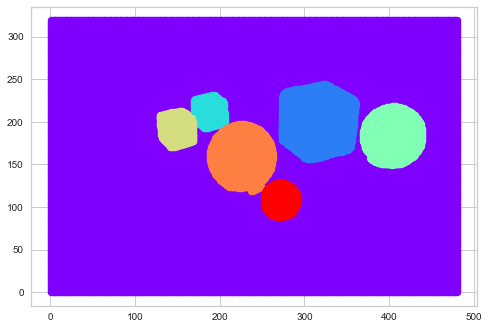

In [236]:
labels = perform_object_segmentation(image_3)
print_color_cluster(labels, rows, cols)

## This worked quite well. There are 2 interesting situations happening. 

### There is small black area caused by very dark shaddow on the bottom of the middle big sphere. This shade was not considered as background as black has high saturation. 

### Second observation is that top right cubes overlap a little bit. Their saturation is not too high and on the other hand the saturation of shades next to them is simmilary high. So the background detection is not perfect

### But in the end the segmentation was successful, because we defined the eps well so even slightly overlaping objects get distinguished between each other. The reason for this is also the min_samples parameter which is by default equal to 5. This together with well chosen eps is the reason for overlapping objects beeign distinguished from each other

## Some troubles with background separation can be seen even with a simple one.

### If we had more complicated background we would need to make the separation better. Today, I believe that deep learning models are used for complicated image segmentation, if we wanted to use clustering, I guess we would have to adjust it based on usage. We would have to make some assumptions about the background, I dont think we could make this work for all cases

In [267]:
def plot_segmentation_and_image(labels, image):
    f, axarr = plt.subplots(1,2)
    xres, yres = get_image_coordinates(image)
    
    df = pd.DataFrame({"labels": labels, "xcoor": xres, "ycoor": yres})
    
    color = iter(cm.rainbow(np.linspace(0, 1, labels.max()+1)))
    plt.subplot(1, 2, 1)
    for cluster in range(df.labels.max()+1):
        temp = df.loc[df["labels"] == cluster]
        plt.scatter(temp.ycoor, abs(temp.xcoor-320), color=next(color))
    
    plt.subplot(1, 2, 2)
    plt.imshow(image)

## Lets generate labels for all data

In [246]:
import pathlib
import os

In [244]:
path_to_data = pathlib.Path.cwd() / "data"

In [247]:
files = [file for file in os.listdir(path_to_data)]

/var/folders/tl/9jjvtgw50rv1lxqnxgptfl940000gn/T/ipykernel_17415/3415348462.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axarr = plt.subplots(1,2)


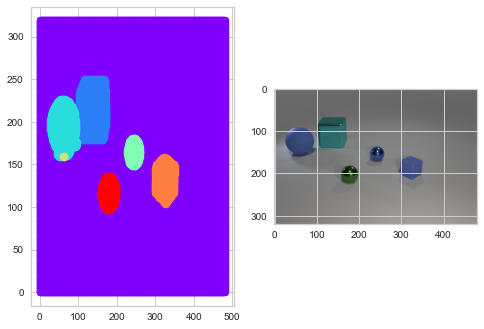

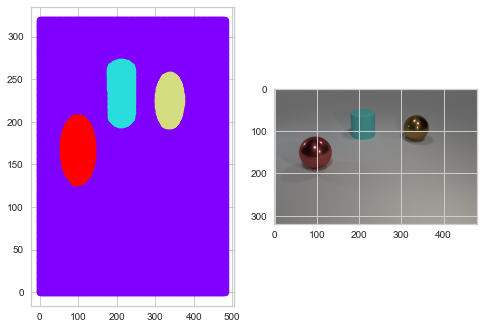

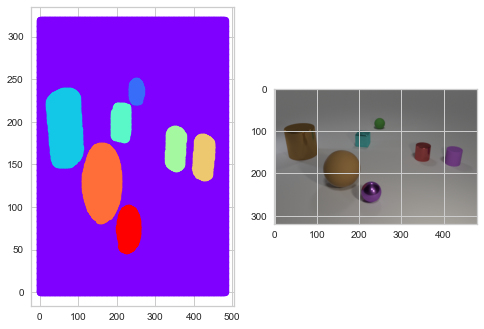

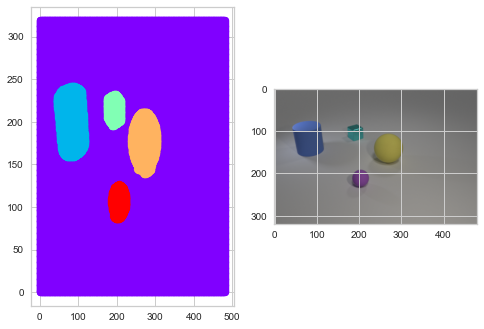

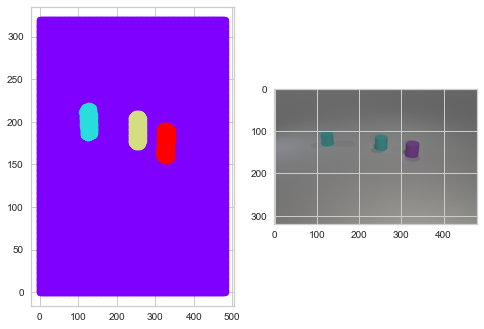

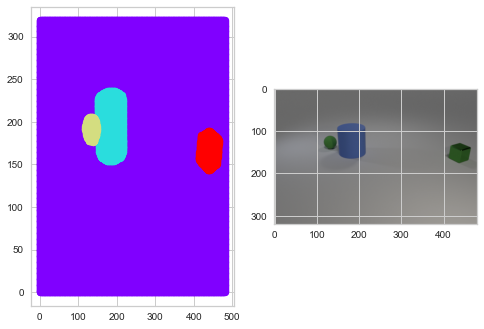

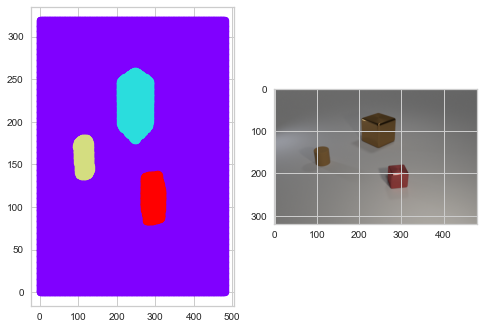

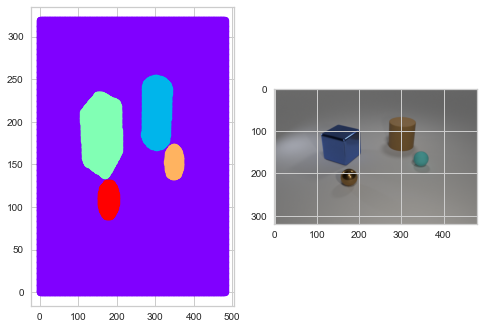

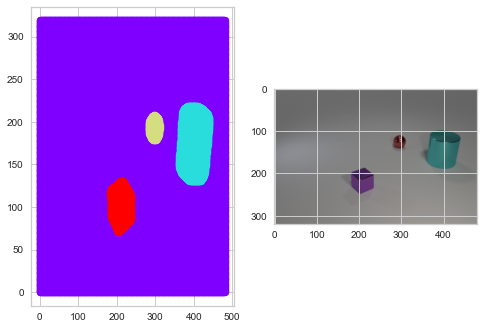

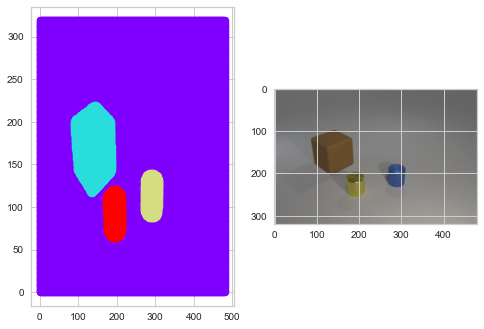

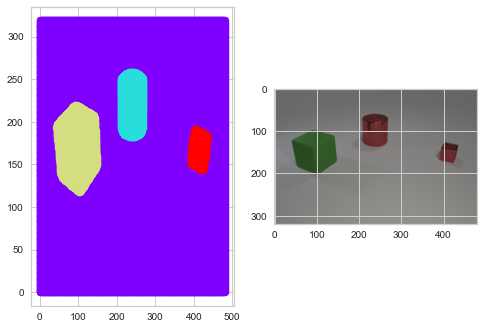

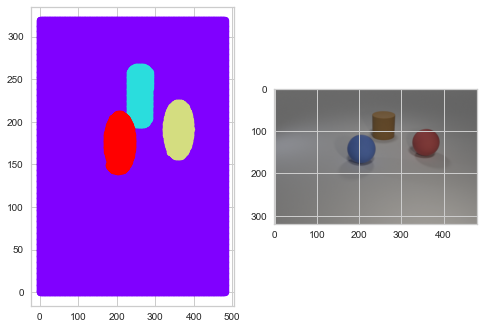

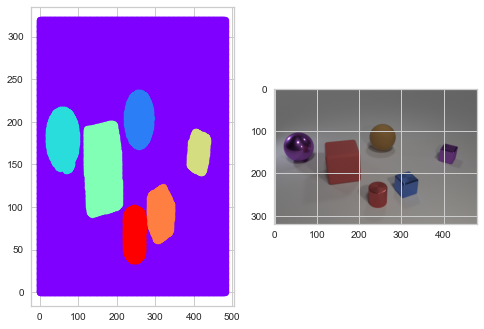

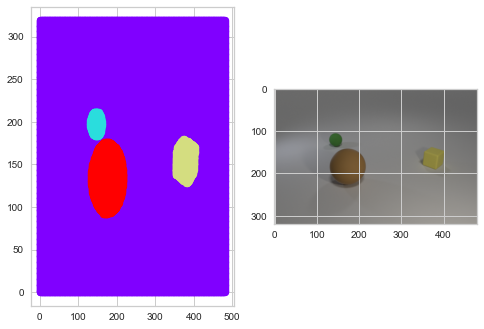

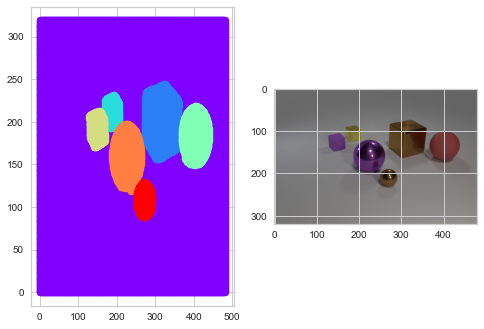

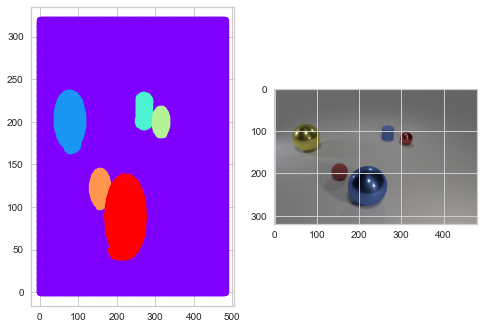

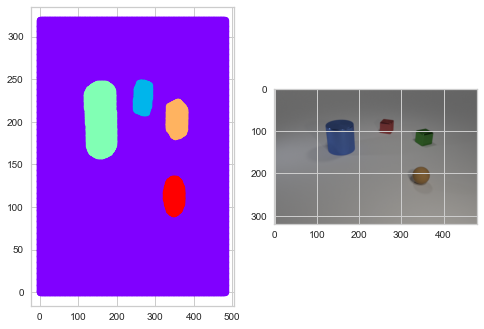

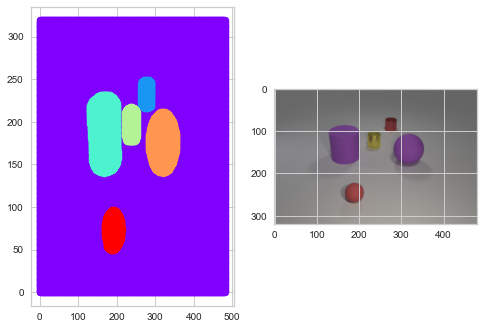

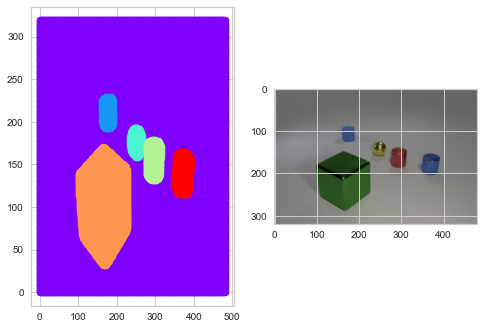

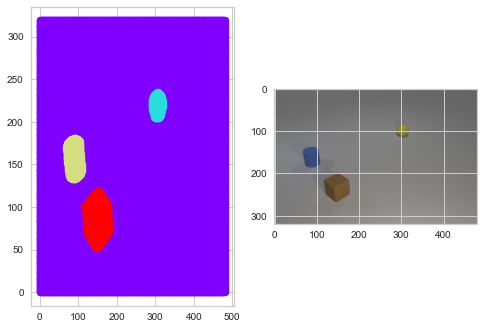

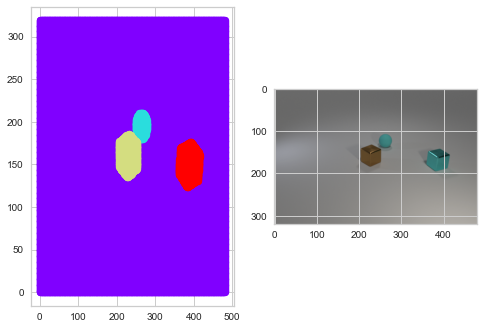

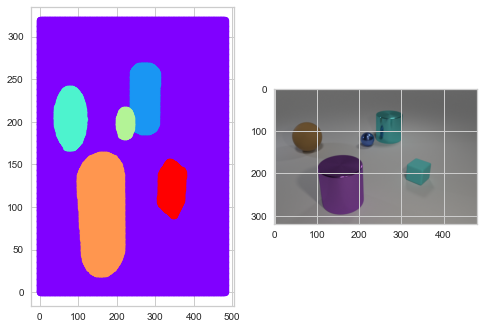

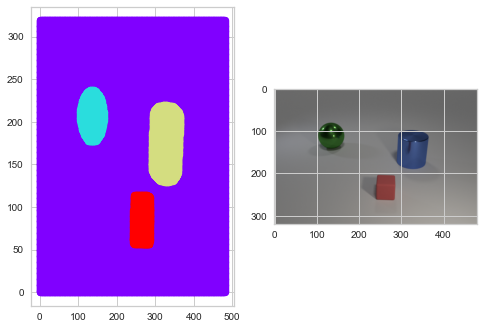

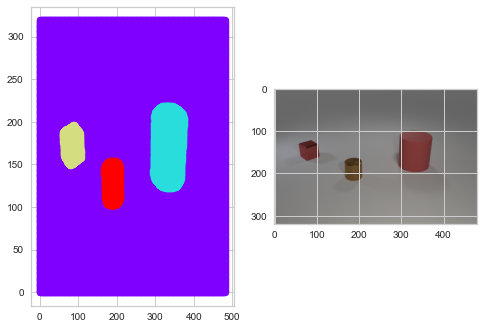

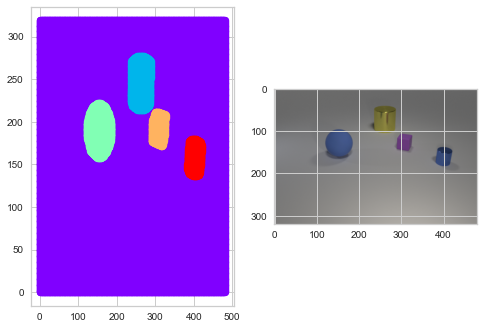

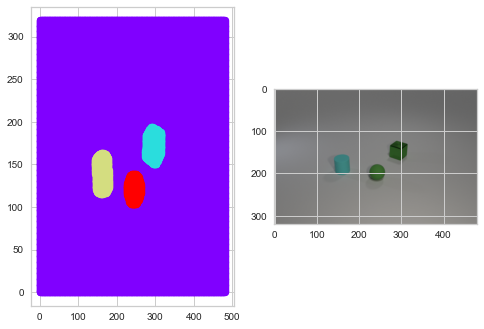

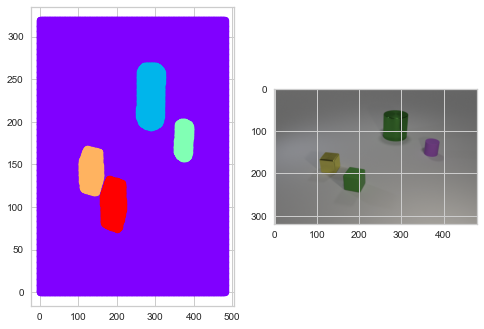

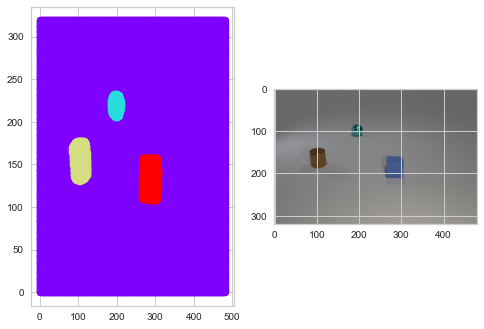

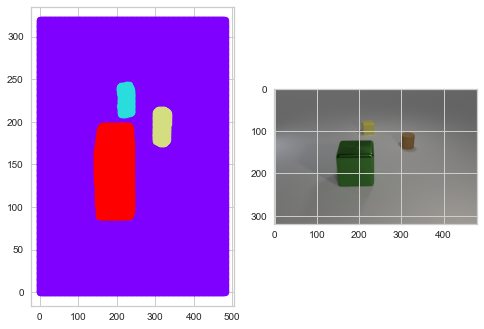

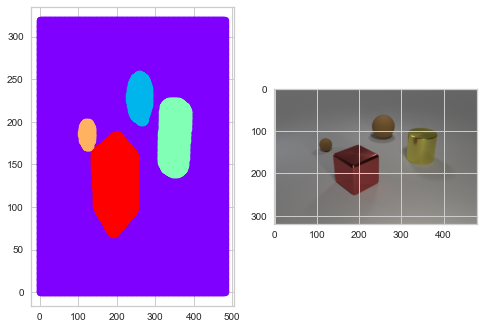

In [269]:
all_labels = {}
for file in files:
    with Image.open(f"data/{file}").convert('HSV') as img:
        labels = perform_object_segmentation(img)
        all_labels[file] = (labels, labels.max())  # save labels and number of objects detected
        plot_segmentation_and_image(labels, img)


In [270]:
for key in all_labels:
    print(f"on image: {key} {all_labels[key][1]} objects detected")

on image: CLEVR_test_001690.png 6 objects detected
on image: CLEVR_test_000559.png 3 objects detected
on image: CLEVR_test_001109.png 7 objects detected
on image: CLEVR_test_000565.png 4 objects detected
on image: CLEVR_test_000997.png 3 objects detected
on image: CLEVR_test_001294.png 3 objects detected
on image: CLEVR_test_001525.png 3 objects detected
on image: CLEVR_test_000388.png 4 objects detected
on image: CLEVR_test_000439.png 3 objects detected
on image: CLEVR_test_000377.png 3 objects detected
on image: CLEVR_test_000411.png 3 objects detected
on image: CLEVR_test_000389.png 3 objects detected
on image: CLEVR_test_000606.png 6 objects detected
on image: CLEVR_test_001530.png 3 objects detected
on image: CLEVR_test_001256.png 6 objects detected
on image: CLEVR_test_000835.png 5 objects detected
on image: CLEVR_test_000821.png 4 objects detected
on image: CLEVR_test_000766.png 5 objects detected
on image: CLEVR_test_000014.png 5 objects detected
on image: CLEVR_test_000941.png

## Results

### We can see the segmentation was quite succesful. The only interesting thing is that all objects seems to be bigger then they really are, so the background separation was not done perfectly. But I think that is is good enough for our purpose